# Setup

In [22]:
include(joinpath("..","src","interactive_setup.jl"))

In [2]:
datadir = joinpath("..","data","count_lengths","run_2018-11-26")

"../data/count_lengths/run_2018-11-26"

In [3]:
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")

results = []
for_results_in(joinpath(datadir,"data"),reinterpret="reinterpret") do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
head(df)

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[3]:2
└ @ Core In[3]:2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[3]:13
└ @ Core In[3]:13


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,0.2,2,2018-11-26T17:38:30.128,1
2,11.4,1,2018-11-26T17:38:30.128,1
3,0.4,2,2018-11-26T17:38:30.128,1
4,5.1,1,2018-11-26T17:38:30.128,1
5,0.4,2,2018-11-26T17:38:30.128,1
6,18.6,1,2018-11-26T17:38:30.128,1


# Figure 3A

In [4]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params[fields])))
herr = human_error()
df_summary = by(params,fields) do row
    next!(progress)
    err = model_error(df,params;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err,herr))
end

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[4]:2
└ @ Core In[4]:2
┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use an explicit broadcast with `df[!, col_ind] .= v`
│   caller = human_stream_data() at measures.jl:212
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/measures.jl:212
┌ Warning: combine(gd) is deprecated, use DataFrame(gd) instead
│   caller = |>(::GroupedDataFrame{DataFrame}, ::typeof(combine)) at operators.jl:813
└ @ Base ./operators.jl:813
Progress:   0%|▏                                        |  ETA: 1:14:36┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use an explicit broadcast with `df[!, col_ind] .= v`
│   caller = #stream_summary#59(::Float64, ::Function, ::DataFrame, ::DataFrame) at measures.jl:147
└ @ Main /Users/davidlittle/Documents/work/projects/b

,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,15.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,44.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,130.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,390.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1100.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3400.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,10000.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
dfplot_ind = @linq df_summary |>
    rename_levels_for([:stream_error,:length_error,:eratio]) |>
    transform(a = packaxes(:c_a,pad=0.25), m = packaxes(:c_m,pad=0.25), rand = randn(length(:c_a))) |>
    transform(eratio_str = fmt.("01.1f",round.(:eratio,digits=1)))
              
head(dfplot_ind)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[10]:5
└ @ Core In[10]:5


,c_a,c_m,level,stream_error,length_error,eratio,a,m
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,Peripheral,0.498731,0.341261,2.29885,0.0,0.0
2,0.0,5.0,Peripheral,0.270752,0.28717,1.40381,0.0,1.25
3,0.0,15.0,Peripheral,0.243425,0.364139,1.42412,0.0,2.25
4,0.0,44.0,Peripheral,0.242422,1.0,2.39274,0.0,3.25
5,0.0,130.0,Peripheral,0.242879,1.0,2.39436,0.0,4.25
6,0.0,390.0,Peripheral,0.242616,1.0,2.39343,0.0,5.25


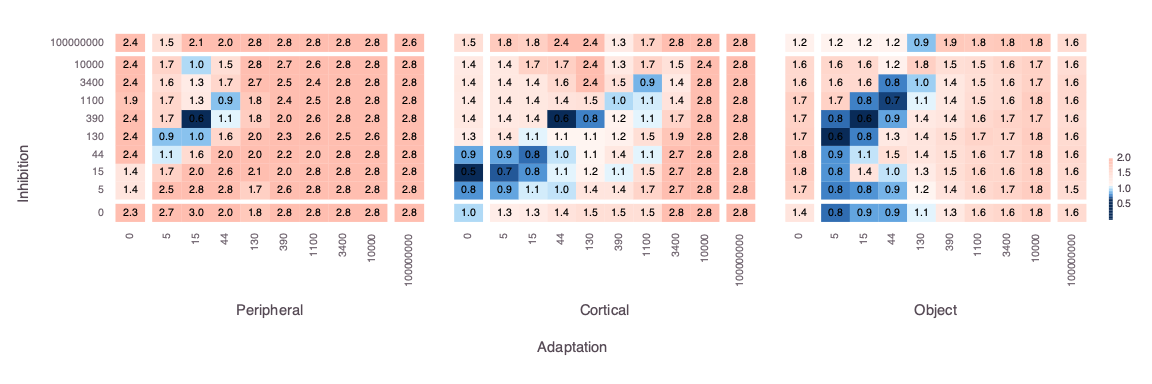

false

In [6]:
xvals = sort!(unique(dfplot_ind.a));
yvals = sort!(unique(dfplot_ind.m));

pl = plot(dfplot_ind,x=:a,y=:m,color=:eratio,xgroup=:level,label=:eratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_a,pad=0.25)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_m,pad=0.25)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Scale.color_continuous(minvalue=0,maxvalue=2,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,
            maxvalue=2,colorstop=4,colorstart=0.65,midvalue=1.15)),
     Guide.colorkey(title=""),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PDF(joinpath(plotdir,"fig3A.pdf"),8.5inch,3.5inch),pl)
draw(PNG(12inch,4inch),pl)

# Figure 3B-C

In [7]:
head(dfplot_ind)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[7]:1
└ @ Core In[7]:1


,c_a,c_m,level,stream_error,length_error,eratio,a,m,rand,eratio_str
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,Peripheral,0.498731,0.341261,2.29885,0.0,0.0,-1.17257,2.3
2,0.0,5.0,Peripheral,0.270752,0.28717,1.40381,0.0,1.25,1.06431,1.4
3,0.0,15.0,Peripheral,0.243425,0.364139,1.42412,0.0,2.25,-0.305586,1.4
4,0.0,44.0,Peripheral,0.242422,1.0,2.39274,0.0,3.25,-0.571594,2.4
5,0.0,130.0,Peripheral,0.242879,1.0,2.39436,0.0,4.25,0.405157,2.4
6,0.0,390.0,Peripheral,0.242616,1.0,2.39343,0.0,5.25,0.908308,2.4


In [8]:
hstr,hlen = human_error_by_sid();
dfstr_ind = vcat(DataFrame(kind=dfplot_ind.level,error=dfplot_ind.stream_error),DataFrame(kind="human",error=hstr.x1));
dflen_ind = vcat(DataFrame(kind=dfplot_ind.level,error=dfplot_ind.length_error),DataFrame(kind="human",error=hlen.x1));

In [9]:
dfstr_ind = @linq dfstr_ind |> where(.!ismissing.(:error));

In [10]:
mean(skipmissing(hstr.x1))

0.14032236445117163

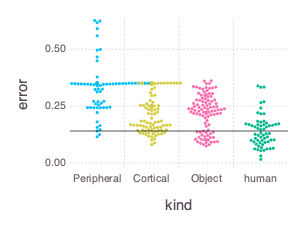

In [11]:
strplot = plot(dfstr_ind,y=:error,x=:kind,color=:kind,intercept=[mean(skipmissing(hstr.x1))],slope=[0],Geom.abline,Geom.beeswarm(padding=0.05mm),
    Coord.cartesian(ymax=0.6,ymin=0.0),Theme(key_position=:none,point_size=0.4mm,default_color="black",line_width=0.5pt),
    Guide.yticks(ticks=[0,0.25,0.5]),
    Guide.xticks(orientation=:horizontal))
draw(PNG(3.2inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig3B.pdf"),3.2inch,2inch),strplot)

In [12]:
mean(hlen.x1)

0.32702577258831556

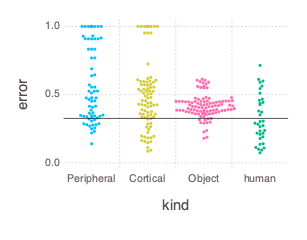

In [34]:
strplot = plot(dflen_ind,y=:error,x=:kind,color=:kind,intercept=[mean(hlen.x1)],slope=[0],Geom.abline,
    Geom.beeswarm(padding=0.05mm),Theme(key_position=:none,point_size=0.4mm,default_color="black",line_width=0.5pt),
    Guide.xticks(orientation=:horizontal),
    Coord.cartesian(ymax=1.0,ymin=0.0))
draw(PNG(3.2inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig3C.pdf"),3.2inch,2inch),strplot)

# Figure 2

In [5]:
length(unique(human_data().stream.sid))

43

In [6]:
threshold = quantile(df_summary.eratio,0.25)

1.3543488916496529

In [7]:
lendf = by(human_data()[2],:sid,mlen = :lengths => median)
lendf[lendf.mlen .< 2,:]

,sid,mlen
,Int64,Float64
1,10,1.4455
2,19,0.6712
3,29,1.8847


In [12]:
best_models = @where(df_summary,:eratio .<= threshold)[:,[:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]]
best_params = map(AuditoryBistabilityLE.read_params,eachrow(best_models))
len = plot_lengths_data(df,params,best_params,normlengths=true,minlength=0.25)

┌ Info: The average simulation response less than minlength=0.25 is: %0.0.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:238
┌ Warning: Eliminating %8.5 of data for human-10.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/measures.jl:248
┌ Info: The average human response less than minlength=0.25 is: %1.23.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:263


(human = [0.945415, 0.927714, 0.577025, 0.909902, 0.989849, 0.90993, 1.07413, 0.506026, 1.24728, 0.0177568  …  1.78998, 0.816131, 0.681691, 1.37264, 3.62628, 1.88739, 0.375602, 0.482266, 1.43754, 1.09439], simulation = [2.24616, 0.876548, 1.7531, 1.15047, 0.931333, 0.38349, 0.712196, 0.876548, 1.7531, 1.36961  …  0.196753, 0.590259, 0.229545, 0.688636, 8.72272, 0.327922, 3.3448, 0.229545, 0.196753, 0.131169])

In [14]:
p1 = plot_stream(df,params,best_params);

In [17]:
using RCall

┌ Info: Loading RCall ggplot2 backend for `PlotAxes`
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/V6M7t/src/PlotAxes.jl:252
┌ Warning: RCall.jl: Warning: package ‘ggplot2’ was built under R version 3.5.2
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113


In [18]:
R"library(logKDE)"

RObject{StrSxp}
[1] "logKDE"    "ggplot2"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     


In [114]:
bw_all = R"bw.ucv($(collect(skipmissing(filter(!iszero,vcat(len.human))))))" 

RObject{RealSxp}
[1] 0.05866034


In [115]:
bw_all = R"bw.ucv($(collect(skipmissing(filter(!iszero,vcat(len.simulation))))))" 

┌ Warning: RCall.jl: Warning in bw.ucv(`#JL`$`(collect(skipmissing(filter(!iszero, vcat(len.simulation)))))`) :
│   minimum occurred at one end of the range
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113


RObject{RealSxp}
[1] 0.01356286


In [118]:
bw_all = R"bw.bcv($(collect(skipmissing(filter(!iszero,vcat(len.human))))),nb=5000)" 

RObject{RealSxp}
[1] 0.0665205


In [119]:
bw_all = R"bw.bcv($(collect(skipmissing(filter(!iszero,vcat(len.simulation))))))" 

RObject{RealSxp}
[1] 0.04032013


In [120]:
bw_all = R"bw.SJ($(collect(skipmissing(filter(!iszero,vcat(len.human))))))" 

RObject{RealSxp}
[1] 0.06542426


In [121]:
bw_all = R"bw.SJ($(collect(skipmissing(filter(!iszero,vcat(len.simulation))))))" 

RObject{RealSxp}
[1] 0.02085398


In [122]:
bw_all = R"bw.nrd($(collect(skipmissing(filter(!iszero,vcat(len.human))))))" 

RObject{RealSxp}
[1] 0.1024221


In [123]:
bw_all = R"bw.nrd($(collect(skipmissing(filter(!iszero,vcat(len.simulation))))))" 

RObject{RealSxp}
[1] 0.08301854


In [124]:
bw_all = R"bw.nrd0($(collect(skipmissing(filter(!iszero,vcat(len.human))))))" 

RObject{RealSxp}
[1] 0.08696214


In [125]:
bw_all = R"bw.nrd0($(collect(skipmissing(filter(!iszero,vcat(len.simulation))))))" 

RObject{RealSxp}
[1] 0.07048744


In [154]:
xmax = 4
# dens1 = R"logdensity($(len.human),to=$xmax,bw=$bw_all)";
# dens2 = R"logdensity($(len.simulation),to=$xmax,bw=$bw_all)";
bw_all = R"bw.nrd($(collect(skipmissing(filter(!iszero,vcat(len.human,len.simulation))))))" 
dens1 = R"density($(len.human),to=$xmax,bw=0.08)";
dens2 = R"density($(len.simulation),to=$xmax,bw=0.08)";

x1 = collect(R"$(dens1)[['x']]");
y1 = collect(R"$(dens1)[['y']]");
x2 = collect(R"$(dens2)[['x']]");
y2 = collect(R"$(dens2)[['y']]");
dens = DataFrame(x=[x1;x2],y=[y1;y2],experiment=[fill("human",length(x1));fill("simulation",length(x2))]);

In [155]:
p2 = plot(dens,x=:x,y=:y,ymax=:y,ymin=fill(0,size(dens,1)),color=:experiment,Geom.line,Geom.ribbon,
         Guide.colorkey(pos=[0.5*Gadfly.w,-0.3*Gadfly.h]),
         Theme(lowlight_color=c->RGBA{Float32}(c.r, c.g, c.b, 0.3)),
         Coord.cartesian(xmin=0,xmax=xmax,ymax=1.0));

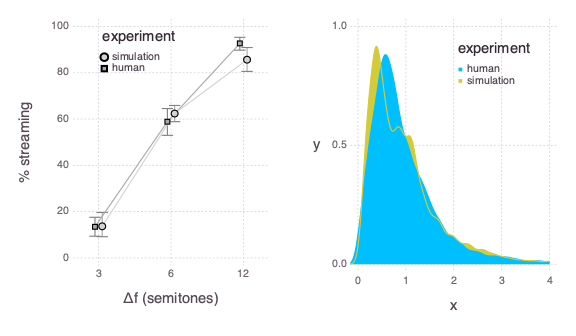

In [156]:
draw(PNG(6inch,3.5inch),hstack(p1,p2))
draw(PDF(joinpath(plotdir,"fig2_raw.pdf"),5inch,2.5inch),hstack(p1,p2))

- we should explore different kernel widths for each population, find a good view of this data
- may still just be to show to reviewers    
- worth generating the other plots from the reviewers comments at this point

In [24]:
hlen = human_data().lengths;

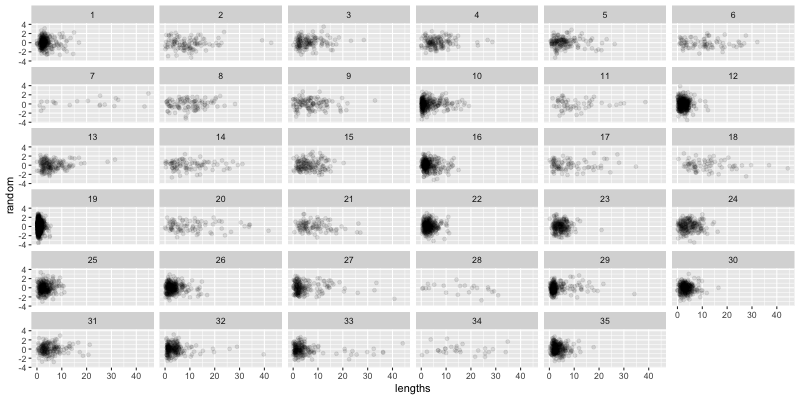

RObject{VecSxp}


In [35]:
R"""
ggplot($hlen,aes(x=lengths,y=rnorm(length(lengths)))) + facet_wrap(~sid) + geom_point(alpha=0.1) + ylab('random')
"""

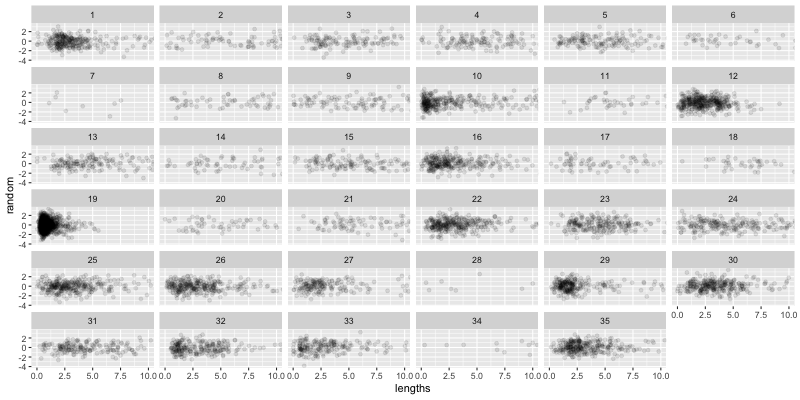

RObject{VecSxp}


In [34]:
R"""
ggplot($hlen,aes(x=lengths,y=rnorm(length(lengths)))) + facet_wrap(~sid) + geom_point(alpha=0.1) + ylab('random') + coord_cartesian(xlim=c(0,10))
"""

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = sexp(::Type{RCall.RClass{:list}}, ::DataFrame) at dataframe.jl:25
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/convert/dataframe.jl:25


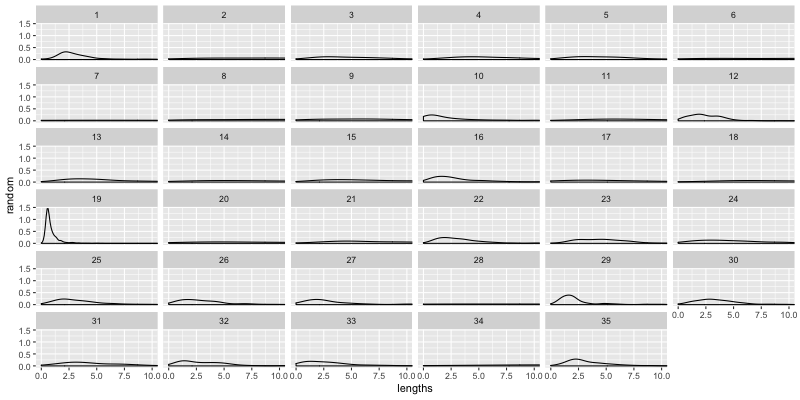

RObject{VecSxp}


In [30]:
R"""
ggplot($hlen,aes(x=lengths)) + facet_wrap(~sid) + geom_density() + ylab('random') + coord_cartesian(xlim=c(0,10))
"""

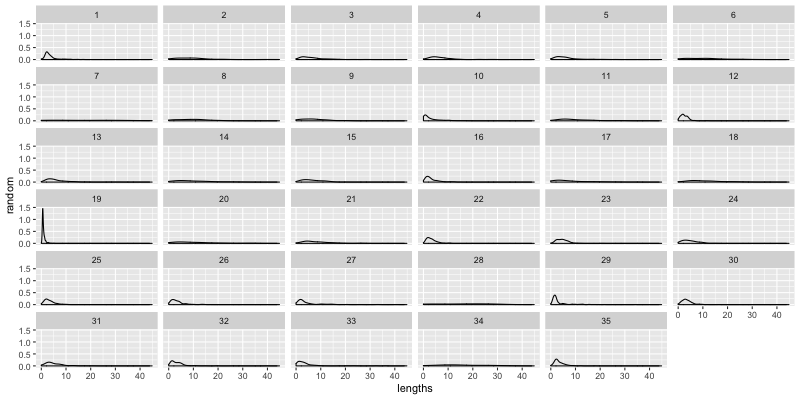

RObject{VecSxp}


In [31]:
R"""
ggplot($hlen,aes(x=lengths)) + facet_wrap(~sid) + geom_density() + ylab('random') 
"""

# Figure 4

In [20]:
datadir_all = joinpath("..","data","count_lengths","run_2018-11-28")
datadir_selected = joinpath("..","data","count_lengths","run_2018-11-30")

"../data/count_lengths/run_2018-11-30"

In [21]:
params_all = load_params(joinpath(datadir_all,"params.jld2"))
params_all[:pindex] = 1:size(params_all,1)
settings = joinpath(srcdir,"settings.toml")

results = []
for_results_in(joinpath(datadir_all,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df_all = vcat(results...);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:31


In [22]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params_all[fields])))
herr = human_error()
df_summary_all = by(params_all,fields) do row
    next!(progress)
    err = model_error(df_all,params_all;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err,herr),pindex = row.pindex[1])
end

Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,stream_error,length_error,eratio,pindex
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.323352,0.265609,1.55827,1
2,0.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.308735,0.267139,1.50853,2
3,0.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.237616,0.987537,2.35655,3
4,0.0,790.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.237616,0.987537,2.35655,4
5,0.0,10000.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.237616,0.987537,2.35655,5
6,0.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.319442,0.247643,1.51687,6
7,0.0,5.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.318658,0.217851,1.46853,7
8,0.0,63.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.237616,0.987537,2.35655,8
9,0.0,790.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.237616,0.987537,2.35655,9


In [23]:
params_selected = load_params(joinpath(datadir_selected,"params.jld2"))
params_selected[:pindex] = 1:size(params_selected,1)
settings = joinpath(srcdir,"settings.toml")

results = []
for_results_in(joinpath(datadir_selected,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df_selected = vcat(results...);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:10


In [24]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params_selected[fields])))
df_summary_selected = by(params_selected,fields) do row
    next!(progress)
    err = model_error(df_selected,params_selected;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths, eratio = error_ratio(err,herr),pindex = row.pindex[1])
end

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:01┌ Warning: Expected 3 parameter entries. 
│ Instead, only found entires: 2×36 DataFrame
│ │ Row │ f_W_m_σ │ f_c_m   │ t_c_a   │ t_c_m   │ f         │ t_W_m_c │ t_c_x   │ f_c_x   │ t_W_m_σ_t │ s_τ_σ     │ f_c_a   │ f_c_σ   │ s_c_m   │ f_τ_a     │ s_c_σ   │ Δt        │ s_τ_m     │ s_c_x   │ t_W_m_σ_ϕ │ t_τ_a     │ s_c_a   │ t_τ_m     │ t_c_σ   │ t_τ_x     │ s_W_m_c │ s_τ_a     │ f_W_m_c │ t_τ_σ     │ f_τ_σ     │ f_τ_x     │ Δf    │ t_W_m_σ_N │ f_τ_m     │ s_τ_x     │ s_W_m_σ │ pindex │
│ │     │ Float64 │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Float64 │ Float64 │ Float64   │ Quantity… │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Quantity… │ Quantity… │ Float64 │ Float64   │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Quantity… │ Quantity… │ Int64 │ Float64   │ Quantity… │ Quantity… │ Float64 │ Int64  │
│ ├─────┼─────────┼─────────┼─────────┼

,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,stream_error,length_error,eratio,pindex
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,5.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.127154,0.226107,0.79878,1
2,5.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.443723,0.211473,1.90441,2
3,5.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.135096,0.513533,1.26653,3
4,5.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.152268,0.17552,0.810924,4
5,5.0,5.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.444997,0.189163,1.87484,5
6,5.0,63.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.13456,0.512624,1.26324,6
7,5.0,0.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.146464,0.20715,0.8386,7
8,5.0,5.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.436585,0.194628,1.85322,8
9,5.0,63.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.130994,0.503249,1.23619,9


In [25]:
# if there is a selected entry with a revised eratio, use that value

df_summary_selected[:procedure] = "selected"
df_summary_all[:procedure] = "survey"
function favor_selected(vals,procedure)
    selected = findfirst(procedure .== "selected")
    if selected isa Nothing
        @assert length(vals) == 1
        first(vals)
    else
        vals[selected]
    end
end
    
df_summary_multi = @linq vcat(df_summary_all,df_summary_selected) |>
    by(fields,eratio = favor_selected(:eratio,:procedure),
              stream_error = favor_selected(:stream_error,:procedure),
              length_error = favor_selected(:length_error,:procedure))
head(df_summary_multi)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[25]:19
└ @ Core In[25]:19


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,eratio,stream_error,length_error
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,1.55827,0.323352,0.265609
2,0.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,1.50853,0.308735,0.267139
3,0.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,2.35655,0.237616,0.987537
4,0.0,790.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,2.35655,0.237616,0.987537
5,0.0,10000.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,2.35655,0.237616,0.987537
6,0.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,1.51687,0.319442,0.247643


In [26]:
mlevels = [(vars = [:f_c_a,:f_c_m], name = "Peripheral"),
          (vars = [:s_c_a,:s_c_m], name = "Cortical"),
          (vars = [:t_c_a,:t_c_m], name = "Object")]
dflevels = map(mlevels) do level
    result = by(df_summary_multi,level.vars) do slice
       DataFrame(c_a = first(slice[level.vars[1]]),c_m = first(slice[level.vars[2]]),
                 level = level.name, 
                 eratio = minimum(skipmissing(slice.eratio)),
                 stream_error = slice.stream_error[argmin(coalesce.(slice.eratio,-Inf))],
                 length_error = slice.length_error[argmin(coalesce.(slice.eratio,-Inf))])
            
    end
    result[[:c_a,:c_m,:level,:eratio,:stream_error,:length_error]]
end

dfplot = @linq vcat(dflevels...) |>
    transform(a = packaxes(:c_a,maxpad=false), m = packaxes(:c_m,maxpad=false)) |>
    transform(eratio_str = fmt.("01.2f",round.(:eratio,digits=2)))
head(dfplot)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[26]:19
└ @ Core In[26]:19


,c_a,c_m,level,eratio,stream_error,length_error,a,m,eratio_str
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,Peripheral,0.917702,0.228196,0.068405,0.0,0.0,0.92
2,0.0,5.0,Peripheral,0.593309,0.109395,0.133108,0.0,1.5,0.59
3,0.0,63.0,Peripheral,0.832414,0.167926,0.153085,0.0,2.5,0.83
4,0.0,790.0,Peripheral,0.795629,0.136545,0.20216,0.0,3.5,0.80
5,0.0,10000.0,Peripheral,0.769383,0.13018,0.199827,0.0,4.5,0.77
6,5.0,0.0,Peripheral,0.539274,0.0961476,0.128638,1.5,0.0,0.54


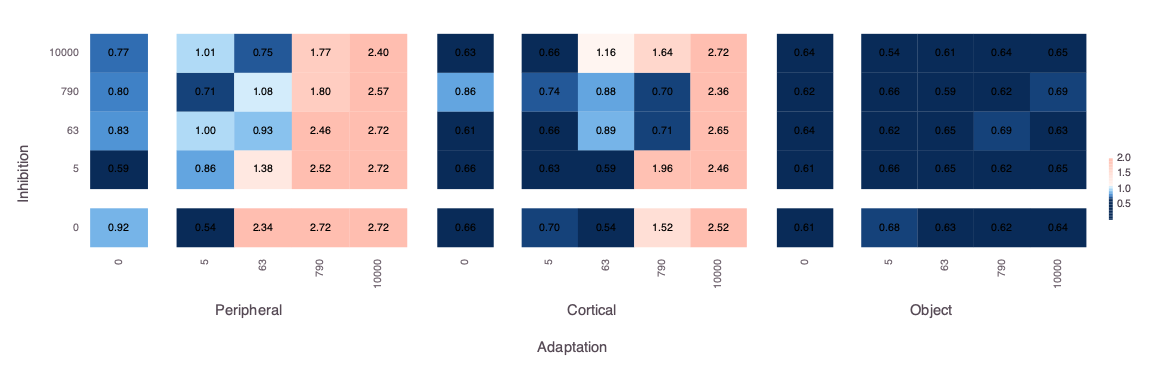

false

In [27]:
xvals = sort!(unique(dfplot.a));
yvals = sort!(unique(dfplot.m));

pl = plot(dfplot,x=:a,y=:m,color=:eratio,xgroup=:level,label=:eratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot.c_a,maxpad=false)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot.c_m,maxpad=false)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Guide.colorkey(title=""),
     Scale.color_continuous(minvalue=0,maxvalue=2,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,
            maxvalue=2,colorstop=4,colorstart=0.65,midvalue=1.15)),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PDF(joinpath(plotdir,"fig4A.pdf"),7.75inch,3.5inch),pl)
draw(PNG(12inch,4inch),pl)

# Figure 4B-C

In [28]:
hstr,hlen = human_error_by_sid();
dfstr_mul = vcat(DataFrame(kind=dfplot.level,error=dfplot.stream_error),DataFrame(kind="human",error=hstr.x1));
dflen_mul = vcat(DataFrame(kind=dfplot.level,error=dfplot.length_error),DataFrame(kind="human",error=hlen.x1));

In [29]:
dfstr_mul = @linq dfstr_mul |> where(.!ismissing.(:error));

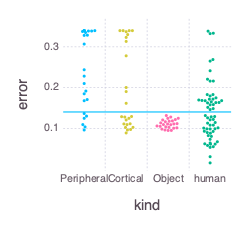

In [30]:
strplot = plot(dfstr_mul,y=:error,x=:kind,color=:kind,intercept=[mean(skipmissing(hstr.x1))],slope=[0],Geom.abline,Geom.beeswarm(padding=0.05mm),
    Coord.cartesian(ymax=0.35),Theme(key_position=:none,point_size=0.4mm),Guide.xticks(orientation=:horizontal))
draw(PNG(2.6inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig4B.pdf"),3.2inch,2inch),strplot)

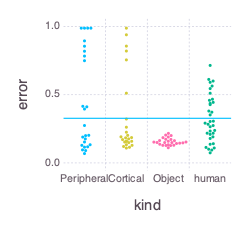

In [31]:
strplot = plot(dflen_mul,y=:error,x=:kind,color=:kind,intercept=[mean(hlen.x1)],slope=[0],Geom.abline,
    Geom.beeswarm(padding=0.05mm),Theme(key_position=:none,point_size=0.4mm),Guide.xticks(orientation=:horizontal))
draw(PNG(2.6inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig4C.pdf"),3.2inch,2inch),strplot)

In [32]:
stats = by(vcat(dflevels...),:level) do x
    DataFrame(mean = mean(skipmissing(x.eratio)),min = minimum(skipmissing(x.eratio)))
end

,level,mean,min
,String,Float64,Float64
1,Peripheral,1.55669,0.539274
2,Cortical,1.20416,0.539274
3,Object,0.63421,0.539274
